# Stock Traiding Agent

From: https://github.com/notadamking/Stock-Trading-Environment.

For baselines, see: https://github.com/hill-a/stable-baselines.

In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext blackcellmagic
%matplotlib inline

In [2]:
import gym
import json
import datetime as dt

import pandas as pd
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

from relearn.env import StockTrading

/data/anaconda/envs/relearn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/anaconda/envs/relearn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/anaconda/envs/relearn/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/anaconda/envs/relearn/lib/python3.7/site-packages/tensorflow/

In [3]:
df = pd.read_csv('./data/AAPL.csv')
df = df.sort_values('Date')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,1998-01-02,13.63,16.25,13.50,16.25,6411700.0
1,1,1998-01-05,16.50,16.56,15.19,15.88,5820300.0
2,2,1998-01-06,15.94,20.00,14.75,18.94,16182800.0
3,3,1998-01-07,18.81,19.00,17.31,17.50,9300200.0
4,4,1998-01-08,17.44,18.62,16.94,18.19,6910900.0


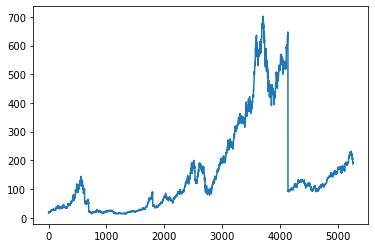

In [10]:
df['Close'].plot()

In [11]:
env = StockTrading(df)

/data/anaconda/envs/relearn/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float16
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [12]:
env.reset()
env.render()

Step: 4781
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000 (Max net worth: 10000)
Profit: 0


In [14]:
# The algorithms require a vectorized environment to run
vecenv = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, vecenv, verbose=1)
model.learn(total_timesteps=20000)





Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


-------------------------------------
| approxkl           | 3.074817e-07 |
| clipfrac           | 0.0          |
| explained_variance | 1.79e-06     |
| fps                | 274          |
| n_updates          | 1            |
| policy_entropy     | 2.8379424    |
| policy_loss        | 4.856661e-05 |
| serial_timesteps   | 128          |
| time_elapsed       | 2.38e-06     |
| total_timesteps    | 128          |
| value_loss         | 11333356.0   |
-------------------------------------
-------------------------------------
| approxkl           | 8.48015e-07  |
| clipfrac           | 0.0          |
| explained_variance | 2.74e-06     |
| fps                | 625          |
| n_updates          | 2            |
| policy_entropy     | 2.8387632    |
| policy_loss        | 7.048296e-05 |
| serial_timesteps   | 256          |
|

/data/home/jumin/git/relearn/relearn/env/StockTradingEnv.py:81: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)


---------------------------------------
| approxkl           | 3.6629185e-08  |
| clipfrac           | 0.0            |
| explained_variance | -2.26e-06      |
| fps                | 630            |
| n_updates          | 3              |
| policy_entropy     | 2.8389924      |
| policy_loss        | -5.7491707e-07 |
| serial_timesteps   | 384            |
| time_elapsed       | 0.672          |
| total_timesteps    | 384            |
| value_loss         | 9687398.0      |
---------------------------------------
---------------------------------------
| approxkl           | 1.8338551e-09  |
| clipfrac           | 0.0            |
| explained_variance | 3.16e-06       |
| fps                | 615            |
| n_updates          | 4              |
| policy_entropy     | 2.8390427      |
| policy_loss        | -3.6600977e-06 |
| serial_timesteps   | 512            |
| time_elapsed       | 0.875          |
| total_timesteps    | 512            |
| value_loss         | 12228255.0     |


---------------------------------------
| approxkl           | 1.8029421e-05  |
| clipfrac           | 0.0            |
| explained_variance | 8.34e-07       |
| fps                | 645            |
| n_updates          | 19             |
| policy_entropy     | 2.853787       |
| policy_loss        | -0.00082691084 |
| serial_timesteps   | 2432           |
| time_elapsed       | 3.98           |
| total_timesteps    | 2432           |
| value_loss         | 12507114.0     |
---------------------------------------
--------------------------------------
| approxkl           | 1.7420829e-05 |
| clipfrac           | 0.0           |
| explained_variance | 3.16e-06      |
| fps                | 636           |
| n_updates          | 20            |
| policy_entropy     | 2.8525226     |
| policy_loss        | -0.0007413975 |
| serial_timesteps   | 2560          |
| time_elapsed       | 4.18          |
| total_timesteps    | 2560          |
| value_loss         | 10403553.0    |
------------

--------------------------------------
| approxkl           | 0.00010129697 |
| clipfrac           | 0.0           |
| explained_variance | -1.55e-06     |
| fps                | 631           |
| n_updates          | 36            |
| policy_entropy     | 2.8591452     |
| policy_loss        | 0.00084394286 |
| serial_timesteps   | 4608          |
| time_elapsed       | 7.43          |
| total_timesteps    | 4608          |
| value_loss         | 14434847000.0 |
--------------------------------------
--------------------------------------
| approxkl           | 0.001984815   |
| clipfrac           | 0.017578125   |
| explained_variance | -8.34e-07     |
| fps                | 640           |
| n_updates          | 37            |
| policy_entropy     | 2.8560793     |
| policy_loss        | -0.0041176854 |
| serial_timesteps   | 4736          |
| time_elapsed       | 7.64          |
| total_timesteps    | 4736          |
| value_loss         | 46140187000.0 |
-------------------------

--------------------------------------
| approxkl           | 0.001255589   |
| clipfrac           | 0.0           |
| explained_variance | 0.000103      |
| fps                | 606           |
| n_updates          | 52            |
| policy_entropy     | 2.8501294     |
| policy_loss        | 0.00071007083 |
| serial_timesteps   | 6656          |
| time_elapsed       | 10.7          |
| total_timesteps    | 6656          |
| value_loss         | 437132.47     |
--------------------------------------
--------------------------------------
| approxkl           | 1.8007877e-05 |
| clipfrac           | 0.0           |
| explained_variance | 3.21e-05      |
| fps                | 639           |
| n_updates          | 53            |
| policy_entropy     | 2.8468387     |
| policy_loss        | 0.0002492303  |
| serial_timesteps   | 6784          |
| time_elapsed       | 10.9          |
| total_timesteps    | 6784          |
| value_loss         | 9813028.0     |
-------------------------

--------------------------------------
| approxkl           | 0.00021678227 |
| clipfrac           | 0.0           |
| explained_variance | -9.54e-07     |
| fps                | 640           |
| n_updates          | 69            |
| policy_entropy     | 2.8353434     |
| policy_loss        | -6.478804e-05 |
| serial_timesteps   | 8832          |
| time_elapsed       | 14.2          |
| total_timesteps    | 8832          |
| value_loss         | 7443860500.0  |
--------------------------------------
---------------------------------------
| approxkl           | 0.00012464041  |
| clipfrac           | 0.0            |
| explained_variance | -1.07e-06      |
| fps                | 625            |
| n_updates          | 70             |
| policy_entropy     | 2.8357658      |
| policy_loss        | -0.00082499615 |
| serial_timesteps   | 8960           |
| time_elapsed       | 14.4           |
| total_timesteps    | 8960           |
| value_loss         | 19756325000.0  |
-------------

---------------------------------------
| approxkl           | 0.0017046051   |
| clipfrac           | 0.005859375    |
| explained_variance | 0              |
| fps                | 624            |
| n_updates          | 85             |
| policy_entropy     | 2.837478       |
| policy_loss        | 0.002986477    |
| serial_timesteps   | 10880          |
| time_elapsed       | 17.4           |
| total_timesteps    | 10880          |
| value_loss         | 145325640000.0 |
---------------------------------------
---------------------------------------
| approxkl           | 0.00048420046  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 641            |
| n_updates          | 86             |
| policy_entropy     | 2.8378022      |
| policy_loss        | 0.0009402726   |
| serial_timesteps   | 11008          |
| time_elapsed       | 17.6           |
| total_timesteps    | 11008          |
| value_loss         | 150730770000.0 |


--------------------------------------
| approxkl           | 0.00036023464 |
| clipfrac           | 0.0           |
| explained_variance | 9.54e-07      |
| fps                | 609           |
| n_updates          | 101           |
| policy_entropy     | 2.841065      |
| policy_loss        | -0.0019273203 |
| serial_timesteps   | 12928         |
| time_elapsed       | 20.7          |
| total_timesteps    | 12928         |
| value_loss         | 17909004000.0 |
--------------------------------------
--------------------------------------
| approxkl           | 0.00034837073 |
| clipfrac           | 0.0           |
| explained_variance | 0             |
| fps                | 637           |
| n_updates          | 102           |
| policy_entropy     | 2.8413959     |
| policy_loss        | -0.0022522372 |
| serial_timesteps   | 13056         |
| time_elapsed       | 20.9          |
| total_timesteps    | 13056         |
| value_loss         | 14266581000.0 |
-------------------------

----------------------------------------
| approxkl           | 0.00018073322   |
| clipfrac           | 0.0             |
| explained_variance | 1.19e-07        |
| fps                | 629             |
| n_updates          | 117             |
| policy_entropy     | 2.8384          |
| policy_loss        | 0.00025275355   |
| serial_timesteps   | 14976           |
| time_elapsed       | 24              |
| total_timesteps    | 14976           |
| value_loss         | 1427562700000.0 |
----------------------------------------
----------------------------------------
| approxkl           | 0.00034314924   |
| clipfrac           | 0.0             |
| explained_variance | 0               |
| fps                | 619             |
| n_updates          | 118             |
| policy_entropy     | 2.8388143       |
| policy_loss        | -0.00049083936  |
| serial_timesteps   | 15104           |
| time_elapsed       | 24.2            |
| total_timesteps    | 15104           |
| value_loss    

----------------------------------------
| approxkl           | 2.3141092e-05   |
| clipfrac           | 0.0             |
| explained_variance | 2.38e-07        |
| fps                | 640             |
| n_updates          | 133             |
| policy_entropy     | 2.8416052       |
| policy_loss        | 0.00062107877   |
| serial_timesteps   | 17024           |
| time_elapsed       | 27.2            |
| total_timesteps    | 17024           |
| value_loss         | 3350330900000.0 |
----------------------------------------
-------------------------------------
| approxkl           | 0.0001153427 |
| clipfrac           | 0.0          |
| explained_variance | 7.75e-07     |
| fps                | 644          |
| n_updates          | 134          |
| policy_entropy     | 2.8416083    |
| policy_loss        | 0.0004995457 |
| serial_timesteps   | 17152        |
| time_elapsed       | 27.4         |
| total_timesteps    | 17152        |
| value_loss         | 429434500.0  |
-----------

---------------------------------------
| approxkl           | 1.7123925e-08  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 647            |
| n_updates          | 149            |
| policy_entropy     | 2.839819       |
| policy_loss        | -3.4859637e-05 |
| serial_timesteps   | 19072          |
| time_elapsed       | 30.5           |
| total_timesteps    | 19072          |
| value_loss         | 315340950000.0 |
---------------------------------------
---------------------------------------
| approxkl           | 0.00081493077  |
| clipfrac           | 0.0            |
| explained_variance | 0              |
| fps                | 626            |
| n_updates          | 150            |
| policy_entropy     | 2.8394206      |
| policy_loss        | 0.0038992637   |
| serial_timesteps   | 19200          |
| time_elapsed       | 30.7           |
| total_timesteps    | 19200          |
| value_loss         | 612619200000.0 |


In [15]:
obs = vecenv.reset()
for i in range(2000):
    action, _states = model.predict(obs)
    obs, rewards, done, info = vecenv.step(action)
    vecenv.render()

Step: 2240
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2241
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2242
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2243
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2244
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2245
Balance: 10000
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2246
Balance: 10000
Sh

Step: 2339
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2340
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2341
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2342
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2343
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2344
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 2434
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2435
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2436
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2437
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2438
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2439
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2536
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2537
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2538
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2539
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2540
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2541
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg 

Step: 2637
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2638
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2639
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2640
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2641
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2642
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 2741
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2742
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2743
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2744
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2745
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2746
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2845
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2846
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2847
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2848
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2849
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2850
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net 

Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2945
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2946
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2947
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2948
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2949
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 2950
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg 

Step: 3046
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3047
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3048
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3049
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3050
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3051
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Profit: 0.0
Step: 3144
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3145
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3146
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3147
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3148
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3149
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Prof

Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3244
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3245
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3246
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3247
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3248
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3249
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net 

Step: 3342
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3343
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3344
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3345
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3346
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3347
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 3441
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3442
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3443
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3444
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3445
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3446
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Profit: 0.0
Step: 3543
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3544
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3545
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3546
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3547
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3548
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Prof

Step: 3640
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3641
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3642
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3643
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3644
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3645
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 3741
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3742
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3743
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3744
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3745
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3746
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 3842
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3843
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3844
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3845
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3846
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3847
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 3939
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3940
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3941
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3942
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3943
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 3944
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 4040
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4041
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4042
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4043
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4044
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4045
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 4133
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4134
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4135
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4136
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4137
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4138
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

Step: 4233
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4234
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4235
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4236
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4237
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step: 4238
Balance: 10000.0
Shares held: 0 (Total sold: 0)
Avg cost for held shares: 0 (Total sales value: 0.0)
Net worth: 10000.0 (Max net worth: 10000)
Profit: 0.0
Step

In [17]:
env.close()